In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [2]:
df = pd.read_csv("./1632300362534233.csv")
# take a look at the dataset
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [4]:
df.isna().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [5]:
df = df.dropna(subset=['Address'])

In [6]:
df = df[df['Address'].str.strip() != '']

In [7]:
(df['Address'].str.strip() == '').sum()

0

In [8]:
df.isna().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [9]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [10]:
df[ df['Area'].str.contains('[^0-9]', regex=True, na=False) ]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
570,"3,310,000,000",2,True,True,True,Ostad Moein,3.310000e+09,110333.33
709,"16,160,000,000",3,True,True,True,Pasdaran,1.616000e+10,538666.67
807,"1,000",2,True,True,False,Damavand,7.000000e+09,233333.33
1604,"8,400,000,000",2,True,True,True,Gheitarieh,8.700000e+09,290000.00
2171,"3,600",2,False,False,False,Shahryar,9.720000e+09,324000.00
2802,"2,550,000,000",2,True,True,True,Central Janatabad,2.550000e+09,85000.00


In [11]:
df = df.rename(columns={"Price(USD)": "Price_USD"})

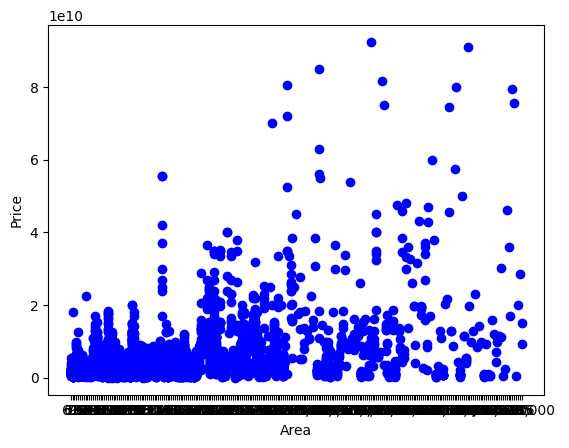

In [12]:
plt.scatter(df.Area, df.Price, color = 'blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [13]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

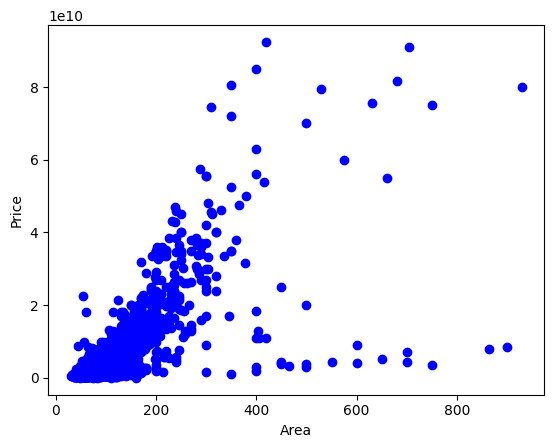

In [14]:
plt.scatter(df.Area, df.Price, color = 'blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [15]:
df['Area'].isna().sum()

6

In [16]:
Q1, Q3 = np.quantile(df['Area'].dropna(), [0.25, 0.75])

In [17]:
IQR = Q3 - Q1
Max_IQR = Q3 + 1.5 * IQR
Min_IQR = Q1 - 1.5 * IQR

In [18]:
# از loc استفاده میکنیم چون میخواهیم مقدار دهی کنیم
df.loc[df['Area'] < Min_IQR, 'Area'] = np.nan #اونهاییکه از مینیمم کمتر هستند  را nan قرار بده
df.loc[df['Area'] > Max_IQR, 'Area'] = np.nan

In [19]:
df['Area'].isna().sum()

244

In [20]:
df = df.dropna(subset=['Area'])

In [21]:
df['Area'].isna().sum()

0

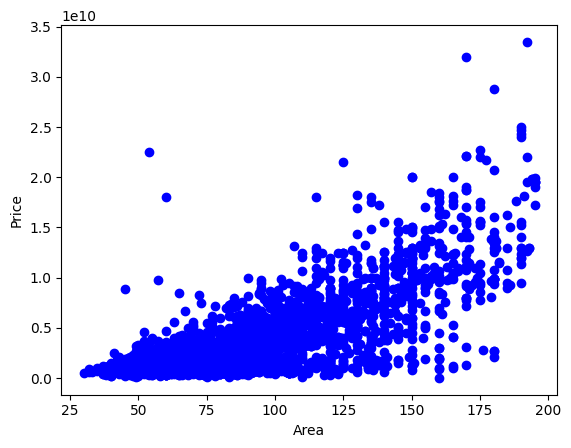

In [22]:
plt.scatter(df.Area, df.Price, color = 'blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

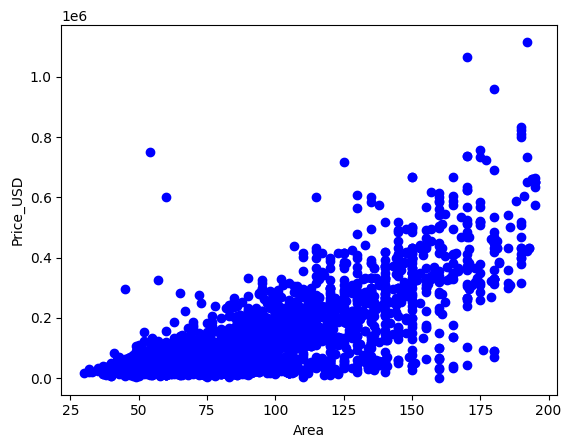

In [23]:
plt.scatter(df.Area, df.Price_USD, color = 'blue')
plt.xlabel("Area")
plt.ylabel("Price_USD")
plt.show()

In [24]:
msk = np.random.rand(len(df)) < 0.8 
train = df[msk]
test = df[~msk]

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr_usd = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])
train_y_usd = np.asanyarray(train[['Price_USD']])
regr.fit (train_x,train_y)
regr_usd.fit(train_x , train_y_usd)
# The Coefficients
print ('Coefficients for Toman : ',regr.coef_) #شیب
print ('Intercept For Toman : ',regr.intercept_) #از کجا شروع بشه
print ('Coefficients for Dollar : ',regr_usd.coef_) #شیب
print ('Intercept For Dollar : ',regr_usd.intercept_) #از کجا شروع بشه

Coefficients for Toman :  [[85222029.22180648]]
Intercept For Toman :  [-4.00157316e+09]
Coefficients for Dollar :  [[2840.73430423]]
Intercept For Dollar :  [-133385.77160882]


Text(0, 0.5, 'Price')

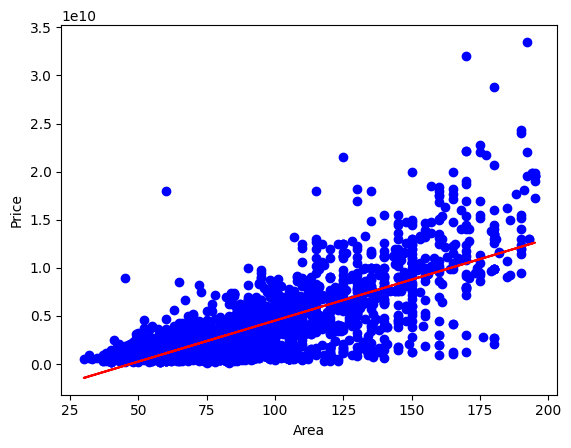

In [26]:
plt.scatter(train.Area,train.Price,color = 'blue')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.xlabel('Area')
plt.ylabel('Price')

## Evaluation

In [27]:
from sklearn.metrics import r2_score #r2 is a number between zero and one as it nearer to one means our model is better

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)
test_y_usd_ = regr_usd.predict(test_x)
# if even we want to build a new machine
# regr.predict([4.2])

print( "Mean absolute error : %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print( "Residual Sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print( "R2-score: %.2f" % r2_score(test_y, test_y_) ) # above 0.75 is good for prediction normally, it's the most important evaluation
print( "R2-score for USD : %.2f" % r2_score(test_y, test_y_usd_) )

Mean absolute error : 1850000905.26
Residual Sum of squares (MSE): 7243121435301926912.00
R2-score: 0.48
R2-score for USD : -1.05


### So in result, this simple linear regression is not good , let's try multiple linear Regression

## Multiple Regresion Model

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr_usd = linear_model.LinearRegression()
x = train[['Area','Room','Parking','Warehouse','Elevator']]
y = train[['Price']]
y_usd = train[['Price_USD']]
regr.fit (x, y)
regr_usd.fit(x,y_usd)
# The coefficients
print ('Coefficients for Toman: ', regr.coef_)
print ('InterCept for Toman: ', regr.intercept_)
print ('Coefficients for Dollar: ', regr_usd.coef_)
print ('InterCept for Dollar: ', regr_usd.intercept_)

Coefficients for Toman:  [[ 9.42405332e+07 -7.67287550e+08  5.25777997e+08  3.97748742e+08
   1.49328237e+08]]
InterCept for Toman:  [-4.24508992e+09]
Coefficients for Dollar:  [[  3141.35110529 -25576.25162264  17525.93302804  13258.29103541
    4977.60795123]]
InterCept for Dollar:  [-141502.99659685]


In [29]:
y_hat = regr.predict(test[['Area','Room','Parking','Warehouse','Elevator']])
y_hat_usd = regr_usd.predict(test[['Area','Room','Parking','Warehouse','Elevator']])
x = test[['Area','Room','Parking','Warehouse','Elevator']]
y = test[['Price']]
y_usd = test[['Price_USD']]
print("Residual sum of squares for Toman: %.2f"
      % np.mean((y_hat - y) ** 2))
print("Residual sum of squares for Dollar: %.2f"
      % np.mean((y_hat_usd - y_usd) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score for Toman: %.2f' % regr.score(x, y))
print('Variance score for Dollar: %.2f' % regr_usd.score(x, y_usd))

Residual sum of squares for Toman: 7064578135712567296.00
Residual sum of squares for Dollar: 7849531235.40
Variance score for Toman: 0.49
Variance score for Dollar: 0.49


### Polynomial Regression

### Create a model, train a model, test it and use the model

In [30]:
cdf = df[['Area','Room','Parking','Warehouse','Elevator','Price','Price_USD']]

In [31]:
cdf.head(9)

,Area,Room,Parking,Warehouse,Elevator,Price,Price_USD
0,63.0,1,True,True,True,1.850000e+09,61666.67
1,60.0,1,True,True,True,1.850000e+09,61666.67
2,79.0,2,True,True,True,5.500000e+08,18333.33
3,95.0,2,True,True,True,9.025000e+08,30083.33
4,123.0,2,True,True,True,7.000000e+09,233333.33
5,70.0,2,True,True,False,2.050000e+09,68333.33
6,87.0,2,True,True,True,6.000000e+08,20000.00
7,59.0,1,True,True,True,2.150000e+09,71666.67
8,54.0,2,True,True,False,4.930000e+08,16433.33


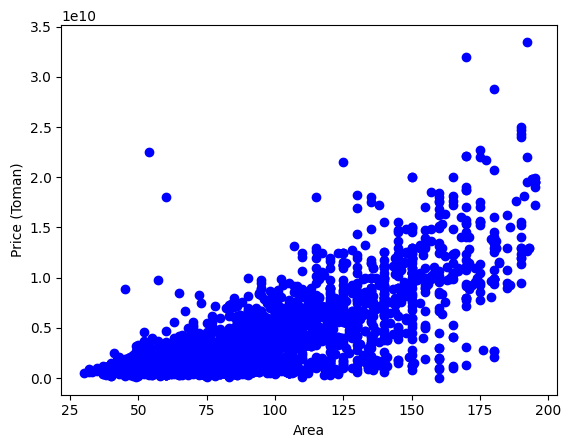

In [32]:
plt.scatter(cdf.Area,cdf.Price,color= 'blue')
plt.xlabel('Area')
plt.ylabel('Price (Toman)')
plt.show()

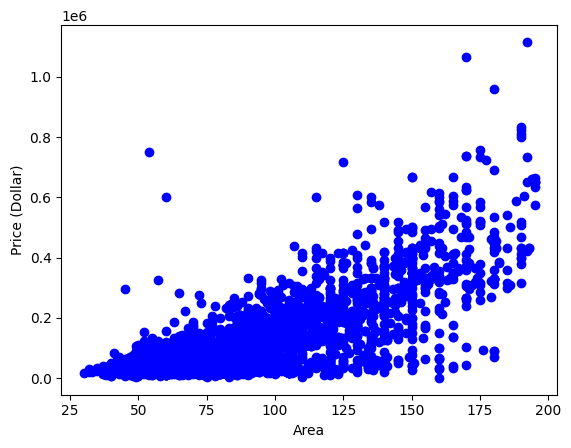

In [33]:
plt.scatter(cdf.Area,cdf.Price_USD,color= 'blue')
plt.xlabel('Area')
plt.ylabel('Price (Dollar)')
plt.show()

### y = b + Θ1x + Θ2x ** 2

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [35]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.0000e+00, 6.0000e+01, 3.6000e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 9.5000e+01, 9.0250e+03],
       ...,
       [1.0000e+00, 7.5000e+01, 5.6250e+03],
       [1.0000e+00, 1.0500e+02, 1.1025e+04],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])